# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [5]:
import torch

In [6]:
torch.__version__

'1.7.1'

### 초기화 되지 않은 행렬 

In [7]:
x = torch.empty(4, 2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


### 무작위로 초기화된 행렬

In [8]:
x = torch.rand(4, 2)
print(x)

tensor([[0.1364, 0.4878],
        [0.1146, 0.3116],
        [0.7900, 0.3541],
        [0.5430, 0.9910]])


### dtype이 long, 0으로 채워진 텐서

In [9]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [10]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [11]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [12]:
x = torch.randn_like(x, dtype=torch.float) # x 모양은 그대로 가져오되, 랜덤으로 채움
print(x)

tensor([[ 0.7305, -0.4693,  0.6571,  0.2785],
        [ 0.3458, -2.0419,  0.7104, -0.9456]])


### 텐서의 크기

In [13]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [14]:
print(x)

tensor([[ 0.7305, -0.4693,  0.6571,  0.2785],
        [ 0.3458, -2.0419,  0.7104, -0.9456]])


In [15]:
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.6724, 0.2491, 0.0728, 0.8664],
        [0.7221, 0.4772, 0.3406, 0.5142]])
tensor([[ 1.4029, -0.2203,  0.7299,  1.1449],
        [ 1.0678, -1.5647,  1.0510, -0.4314]])


### 덧셈2

In [16]:
print(torch.add(x, y))

tensor([[ 1.4029, -0.2203,  0.7299,  1.1449],
        [ 1.0678, -1.5647,  1.0510, -0.4314]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [17]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.4029, -0.2203,  0.7299,  1.1449],
        [ 1.0678, -1.5647,  1.0510, -0.4314]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [18]:
print(x)
print(y)
y.add_(x) # y += x
print(y)

tensor([[ 0.7305, -0.4693,  0.6571,  0.2785],
        [ 0.3458, -2.0419,  0.7104, -0.9456]])
tensor([[0.6724, 0.2491, 0.0728, 0.8664],
        [0.7221, 0.4772, 0.3406, 0.5142]])
tensor([[ 1.4029, -0.2203,  0.7299,  1.1449],
        [ 1.0678, -1.5647,  1.0510, -0.4314]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [19]:
x = torch.Tensor([[1,2],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1., -2.],
        [-1., -1.]])
tensor([[-1., -2.],
        [-1., -1.]])
tensor([[-1., -2.],
        [-1., -1.]])


In [20]:
x = torch.Tensor([[1,2],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2.,  8.],
        [30., 56.]])
tensor([[ 2.,  8.],
        [30., 56.]])
tensor([[ 2.,  8.],
        [30., 56.]])


In [21]:
x = torch.Tensor([[1,2],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.5000],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.5000],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.5000],
        [0.8333, 0.8750]])


In [22]:
# 행렬 곱

x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(torch.mm(x, y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [23]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [24]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [25]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x.size())
print(y.size())
print(z.size())

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [26]:
x = torch.randn(1)
print(x)
print(x.item()) # item은 실제 존재하는 값을 출력
print(x.dtype)

tensor([-0.5796])
-0.5796216130256653
torch.float32


- 스칼라값 하나만 존재해야함

In [27]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([ 0.0163, -0.5312])


ValueError: only one element tensors can be converted to Python scalars

### squeeze 
- 차원을 축소(제거)

In [28]:
tensor = torch.rand(1, 3, 3)
tensor.shape

torch.Size([1, 3, 3])

In [29]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.9965, 0.4982, 0.9327],
        [0.1674, 0.9794, 0.7687],
        [0.4964, 0.0900, 0.7723]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [30]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.0090, 0.3771, 0.2244],
         [0.4832, 0.5697, 0.9270],
         [0.1131, 0.1186, 0.2343]]])
torch.Size([1, 3, 3])


In [31]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.0090, 0.3771, 0.2244],
          [0.4832, 0.5697, 0.9270],
          [0.1131, 0.1186, 0.2343]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [32]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [33]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[[-0.1752,  0.1866, -1.5733],
          [ 0.6942, -0.3779,  1.4861],
          [-0.6168, -0.2004,  0.5868]]],


        [[[-0.5854,  0.0159, -0.9685],
          [-0.4702,  2.1106, -0.7855],
          [ 1.2723,  0.2302,  0.5311]]]])
torch.Size([2, 1, 3, 3])


In [34]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[[-0.3662,  1.5685, -0.0570],
          [ 1.1396, -0.0481,  0.2125],
          [ 0.0467,  1.5326, -1.4442]]],


        [[[-1.7959,  0.3558,  0.7515],
          [ 1.7988, -0.6035, -0.1324],
          [-0.0990,  0.0146,  0.8388]]]])
torch.Size([2, 1, 3, 3])


In [35]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=1)

print(c)
print(c.size())

tensor([[[ 0.3882,  0.8124, -0.2160],
         [-1.5805, -0.0826,  0.8876],
         [-0.1478,  0.7554,  0.2387],
         [ 0.6822,  1.2933,  1.1244],
         [-0.0926,  0.5437, -0.0403],
         [-1.2582, -0.4290, -1.2237]]])
torch.Size([1, 6, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [36]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.1922, 0.7639, 0.9714, 0.9910, 0.5425, 0.6984],
        [0.0602, 0.0840, 0.4190, 0.2966, 0.7102, 0.1967],
        [0.0583, 0.5205, 0.8379, 0.5632, 0.2177, 0.3999]])
tensor([[0.1922, 0.7639],
        [0.0602, 0.0840],
        [0.0583, 0.5205]])
tensor([[0.9714, 0.9910],
        [0.4190, 0.2966],
        [0.8379, 0.5632]])
tensor([[0.5425, 0.6984],
        [0.7102, 0.1967],
        [0.2177, 0.3999]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [43]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.7099, 0.3394, 0.4006, 0.7464, 0.6270, 0.2052],
        [0.7251, 0.9333, 0.6631, 0.1988, 0.6035, 0.5055],
        [0.6480, 0.6004, 0.9905, 0.1201, 0.4180, 0.3201]])
tensor([[0.7099, 0.3394, 0.4006],
        [0.7251, 0.9333, 0.6631],
        [0.6480, 0.6004, 0.9905]])
tensor([[0.7464, 0.6270, 0.2052],
        [0.1988, 0.6035, 0.5055],
        [0.1201, 0.4180, 0.3201]])


In [42]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.split(tensor, 2, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.1180, 0.4988, 0.5982, 0.1992, 0.6785, 0.8217],
        [0.4125, 0.5807, 0.6859, 0.2323, 0.2702, 0.6624],
        [0.5821, 0.0659, 0.2783, 0.1323, 0.2304, 0.6171]])
tensor([[0.1180, 0.4988],
        [0.4125, 0.5807],
        [0.5821, 0.0659]])
tensor([[0.5982, 0.1992],
        [0.6859, 0.2323],
        [0.2783, 0.1323]])
tensor([[0.6785, 0.8217],
        [0.2702, 0.6624],
        [0.2304, 0.6171]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [44]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [45]:
b = a.numpy()
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [48]:
a.add_(1) # a에다 1이 더해짐
print(a)
print(b)

tensor([4., 4., 4., 4., 4., 4., 4.])
[4. 4. 4. 4. 4. 4. 4.]


In [49]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [50]:
import torch

In [62]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.7280])
1.7280490398406982
torch.float32


In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device) # 만들어진 x를 gpu로 옮기겠다
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([2.7280], device='cuda:0')
tensor([2.7280], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [1]:
import torch

In [2]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [3]:
y = x + 5 # by broadcast
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [4]:
print(y.grad_fn)

In [5]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [8]:
a = torch.randn(3, 3)
a = ((a * 3) / (a- 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [9]:
out.backward()

In [10]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [12]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1352.9348, -569.2090,  882.2342], grad_fn=<MulBackward0>)


In [14]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v) # y를 backward 할 때 v를 넣음

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [15]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [16]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [17]:
import torch

In [18]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [19]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [21]:
print("a.data:",a.data)
print("a.grad:", a.grad)
print("a.grad_fn:",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn: None


- $b = a + 2$

In [22]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [23]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [24]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [25]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [27]:
print("a.data:",a.data)
print("a.grad:", a.grad)
print("a.grad_fn:",a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [28]:
print("b.data:", b.data)
print("b.grad:", b.grad)
print("b.grad_fn:",b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x00000225480DD278>


C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [29]:
print("c.data:", c.data)
print("c.grad:", c.grad)
print("c.grad_fn:",c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x00000225480DC9B0>


C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [30]:
print("out.data:", out.data)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x00000225480DC710>


C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [31]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [32]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [33]:
print("x.data:", x.data)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [34]:
print("y.data:", y.data)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x0000022547F68A58>


C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [35]:
print("z.data:", z.data)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x0000022547F682B0>


C:\Users\poeun\anaconda3\envs\tf2.4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [13]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [14]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) # dilation = 패딩 사이의 간격

input = torch.randn(20, 16, 50 ,100)
print(input)
output = m(input)
print(output)

tensor([[[[ 1.5369e-01, -1.1988e+00,  1.2930e+00,  ..., -2.0816e-01,
           -5.7843e-01, -3.7663e-01],
          [-3.1767e-01, -2.6724e+00, -6.4373e-01,  ...,  3.4081e-01,
           -5.8146e-01,  8.3539e-01],
          [-2.9369e-01,  5.9791e-01, -5.1090e-01,  ...,  1.1004e+00,
            3.5490e-03,  1.8418e+00],
          ...,
          [ 2.9820e-02, -3.6088e-01,  2.2031e-01,  ..., -8.1506e-01,
            3.8092e-01, -1.2579e-01],
          [ 6.6572e-01, -7.0657e-02,  3.9870e-02,  ..., -1.5741e+00,
           -8.5371e-02, -4.8397e-01],
          [ 2.9279e-02,  6.4186e-02,  1.9752e-01,  ...,  1.7173e+00,
           -1.3983e-01,  3.9611e-02]],

         [[ 5.0685e-01, -1.1660e+00,  1.8460e+00,  ...,  2.1293e+00,
            1.8949e-01, -8.3017e-01],
          [-2.0222e-01, -1.0570e+00, -1.9730e+00,  ...,  1.0664e+00,
            1.8952e+00,  9.2311e-03],
          [ 7.0666e-01,  1.6990e+00,  3.1035e-01,  ..., -1.9211e+00,
           -9.7900e-02, -2.2241e-01],
          ...,
     

In [15]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [16]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [17]:
filters = torch.randn(8, 4, 3, 3)

In [18]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [19]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [20]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [22]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform=transform)
testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform=transform)


In [23]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2) # 배치 사이즈만큼 dataloader가 데이터를 가져옴
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [24]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [26]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [27]:
image = torch_image.numpy()
image.shape

(28, 28)

In [28]:
label = labels[1].numpy()
label.shape # 스칼라이므로 없다

()

In [29]:
label

array(6, dtype=int64)

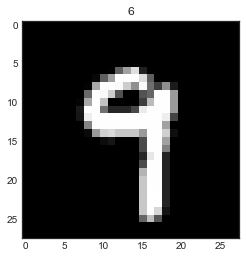

In [30]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [32]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [33]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [34]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [35]:
weight = weight.detach()

In [36]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

In [37]:
import matplotlib.pyplot as plt

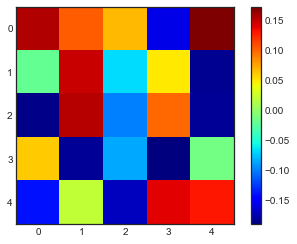

In [38]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [39]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [40]:
input_image = torch.unsqueeze(images[0], dim=0)

In [41]:
output_data = layer(input_image)

In [42]:
output = output_data.data

In [43]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

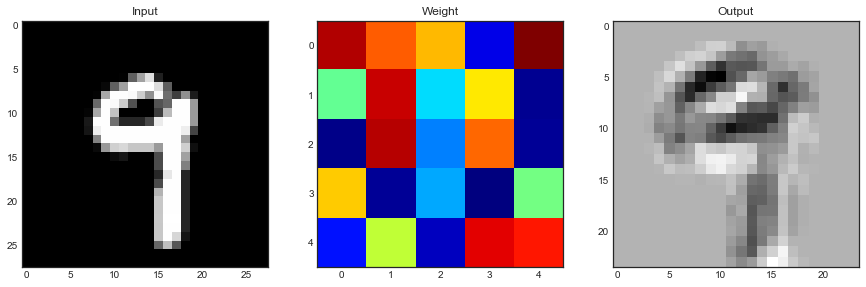

In [45]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [46]:
image.shape

(28, 28)

In [47]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [48]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

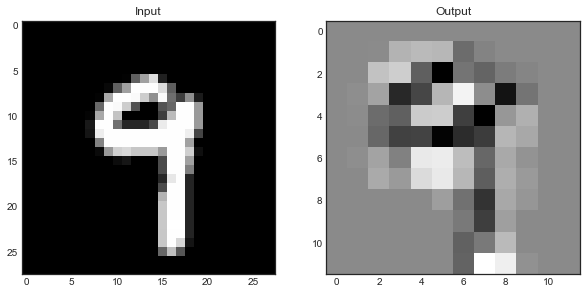

In [50]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [51]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [52]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [53]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [54]:
lin

tensor([[ 0.6141,  0.0517, -0.8529, -0.1260, -0.3787, -0.4828,  0.5421, -0.7252,
          0.5936, -0.9003]], grad_fn=<AddmmBackward>)

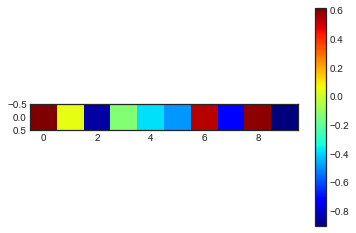

In [55]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [56]:
with torch.no_grad():
    flatten = image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [57]:
softmax

tensor([[0.0288, 0.0974, 0.1947, 0.1057, 0.0938, 0.1706, 0.0946, 0.0966, 0.0808,
         0.0369]])

In [59]:
import numpy as np

np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [64]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [66]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

